<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')

In [86]:
roomba_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [87]:
mobile_robot_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [105]:
import datetime
from datetime import datetime


def get_Date_Formatted(date_list):
  datetime_obj_list=[]
  for x in date_list:
    datetimeObj = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    datetime_obj_list.append(datetimeObj)
  return datetime_obj_list


mobile_robot_data['timestamp']=get_Date_Formatted(mobile_robot_data['timestamp'])
roomba_data['timestamp']=get_Date_Formatted(roomba_data['timestamp'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


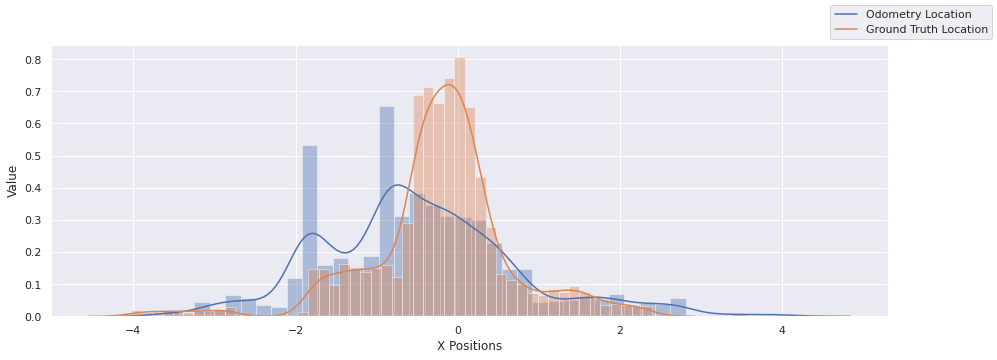

In [143]:
fig=plt.figure(figsize = (15,5))
sns.distplot(roomba_data['X_ODOM'])
sns.distplot(roomba_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


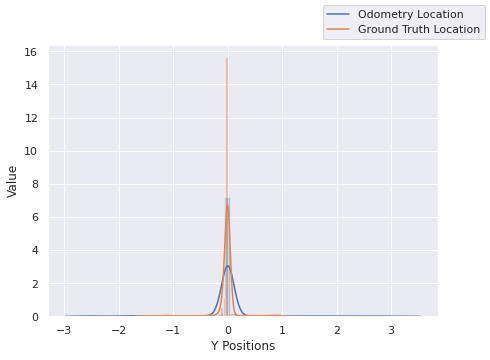

In [147]:
fig=plt.figure(figsize = (7,5))
sns.distplot(roomba_data['Y_ODOM'])
sns.distplot(roomba_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


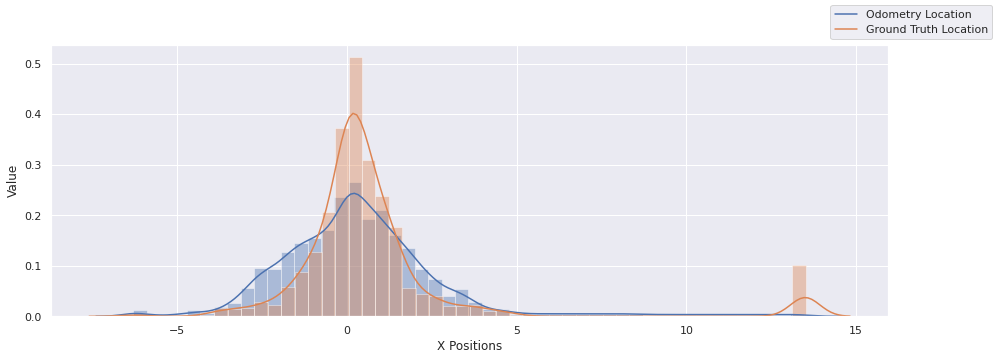

In [148]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['X_ODOM'])
sns.distplot(mobile_robot_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


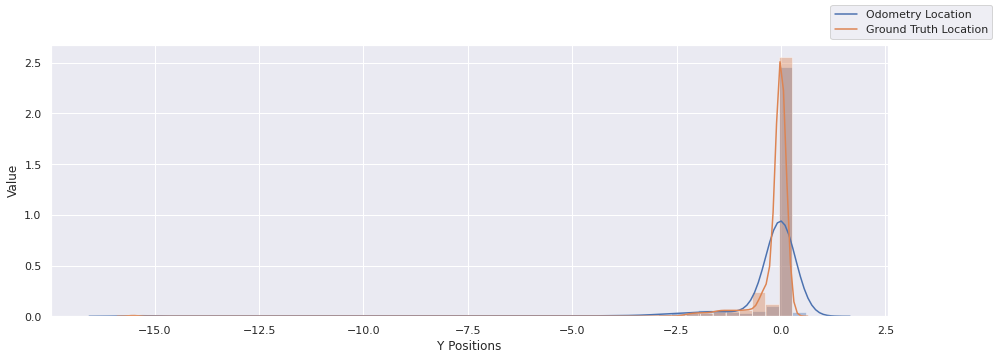

In [149]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['Y_ODOM'])
sns.distplot(mobile_robot_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


In [ ]:

import matplotlib.ticker as ticker
# df=mobile_robot_data[mobile_robot_data['Velocity']< -0.45 ]

# g=sns.tsplot(data = df['Velocity'], time  = df['timestamp'])

# g.xaxis.set_major_locator(ticker.LinearLocator(20))


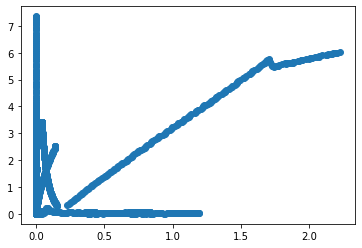

In [6]:
df = roomba_data[["Distance_travelled_error", "Y_error"]]
plt.scatter(df["Y_error"],df["Distance_travelled_error"], )

In [31]:
X = df.values
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

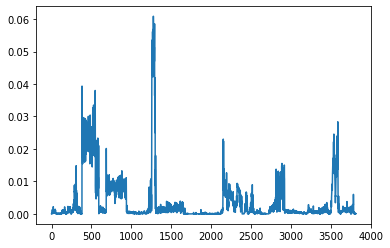

In [32]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [20]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.03)
outlier_index

(array([ 382,  461,  484,  516,  521,  522,  523,  527,  532,  533,  547,
        1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266,
        1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277,
        1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288,
        1289, 1290, 1291, 1292, 1293, 1294, 1296, 1297, 1298]),)

In [21]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,Distance_travelled_error,Y_error
382,0.321018,0.229934
461,2.943610,0.928525
484,3.710134,1.132554
516,4.726651,1.432824
521,4.904970,1.473123
522,4.953510,1.475135
523,4.999874,1.493205
527,5.148624,1.538472
532,5.318811,1.579312
533,5.365851,1.597273


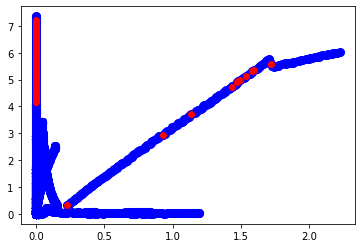

In [23]:
# plot data
plt.scatter(df["Y_error"],df["Distance_travelled_error"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Y_error"], outlier_values["Distance_travelled_error"], color = "r")
